## <b> Image Watermark </b>

In this project, watermarks are added to images programmatically. This works as a means to copyright your image to prevent piracy. OpenCV is used in this project to add logo and text as a watermark.

In [1]:
import cv2 as cv
import numpy as np
import requests
from PIL import Image

### Loading in the base image and logo

We load in our watermark image and store it with the `image` variable name. Then we resize and store it into 2 variables for logo and text watermarking.

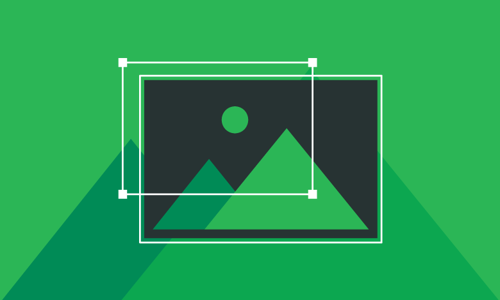

In [2]:
def load_image(img_path):
    if 'https' in img_path:
        response = requests.get(img_path, stream=True).raw
        image = Image.open(response)
    else:
       image = Image.open(img_path)
    return image

image = load_image('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png')
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

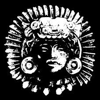

In [3]:
logo = Image.open('IMG_2611.jpg')
logo = logo.resize((100, 100))
logo

### Inserting the watermark image & Displaying the Result

We convert each image to RGB mode, and then turn them to Numpy arrays. Then we extract the shapes of the image and logo

In [4]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

We must place our watermark in the centre of the image, hence the centre of the image should be calcuated (in terms of the height and width).

In [5]:
centre_x, centre_y = int(w_image/2), int(h_image/2)
top_y = centre_y - int(h_logo/2) 
bottom_y = top_y + h_logo
left_x = centre_x - int(w_logo/2)
right_x = left_x + w_logo

Next, we get our region of interest, which is the area weneed to place our watermark.

In [14]:
# Get the region of interest
roi = image_logow[top_y: bottom_y, left_x:right_x]

result = cv.addWeighted(roi, 1, logo, 1, 0)

cv.line(image_logow, (0, centre_y), (left_x, centre_y), (255,255,255), 1)
cv.line(image_logow, (right_x, centre_y), (w_image, centre_y), (255,255,255), 1)

roi = image_logow[top_y: bottom_y, left_x:right_x] = result

In [13]:
# Printing the generated image with a watermark
cv.imshow('image', image_logow)
cv.waitKey(0)

-1

### Inserting the watermark text & Displaying the Result

Next, we use a text as a watermark. We wwill convert our image into RGB and save it as a numpy array. We will use the `putText()` function of OpenCV.

In [21]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv.putText(image_text, text='Inca Tribute', org=(w_image - 110, h_image-10), fontFace = cv.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color = (255,255,255), thickness=1, lineType = cv.LINE_4)
cv.imshow('image', image_text)
cv.waitKey(0)

-1

### Summary

This project seeks to protect organisations from piracy by applying watermarks to their images. Adding a watermark serves as copyrighting an image. For this project, OpenCV was used to overlap the watermark image & text on the base image.